In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.12) on 2024-02-15 10:10.


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


In [4]:
import os
os.chdir('D:/KP/mouse_brain_project')

In [5]:
import scanpy.external as sce

In [ ]:
# 4 samples
#WT_M_p5
#WT_F_p5
#KO_M_p5
#KO_F_p5

In [ ]:
# 8 samples
#WT_M_p5
adata_1 = sc.read_10x_mtx('D:/KP/mouse_brain_project/WT_M_p5',
                            var_names='gene_symbols', cache=True)
#WT_F_p5
adata_2 = sc.read_10x_mtx('D:/KP/mouse_brain_project/WT_F_p5',
                            var_names='gene_symbols', cache=True)                         
#KO_M_p5
adata_3 = sc.read_10x_mtx('D:/KP/mouse_brain_project/KO_M_p5',
                            var_names='gene_symbols', cache=True)
#KO_F_p5
adata_4 = sc.read_10x_mtx('D:/KP/mouse_brain_project/KO_F_p5',
                            var_names='gene_symbols', cache=True)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [ ]:
ls = [adata_1, adata_2, adata_3,adata_3 , adata_4, adata_4]

In [8]:
for a in ls:
    if a is not None:
        a.var_names_make_unique()
print('done')

done


In [9]:
for a in ls:
    if a is not None:
        sc.pp.filter_cells(a, min_genes=200)
        sc.pp.filter_genes(a, min_cells=3)
print('done')

filtered out 45 cells that have less than 200 genes expressed
filtered out 10441 genes that are detected in less than 3 cells
filtered out 167 cells that have less than 200 genes expressed
filtered out 10237 genes that are detected in less than 3 cells
filtered out 670 cells that have less than 200 genes expressed
filtered out 11933 genes that are detected in less than 3 cells
filtered out 747 cells that have less than 200 genes expressed
filtered out 11695 genes that are detected in less than 3 cells
filtered out 4 cells that have less than 200 genes expressed
filtered out 22975 genes that are detected in less than 3 cells
filtered out 25 cells that have less than 200 genes expressed
filtered out 15989 genes that are detected in less than 3 cells
filtered out 158 cells that have less than 200 genes expressed
filtered out 15687 genes that are detected in less than 3 cells
filtered out 48 cells that have less than 200 genes expressed
filtered out 15418 genes that are detected in less th

In [10]:
for a in ls:
    if a is not None:
        a.var['mt'] = a.var_names.str.startswith('mt-')
        sc.pp.calculate_qc_metrics(a, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
        sc.pp.normalize_total(a)
        sc.pp.log1p(a)
print('done')

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished ({time_passed})
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
done


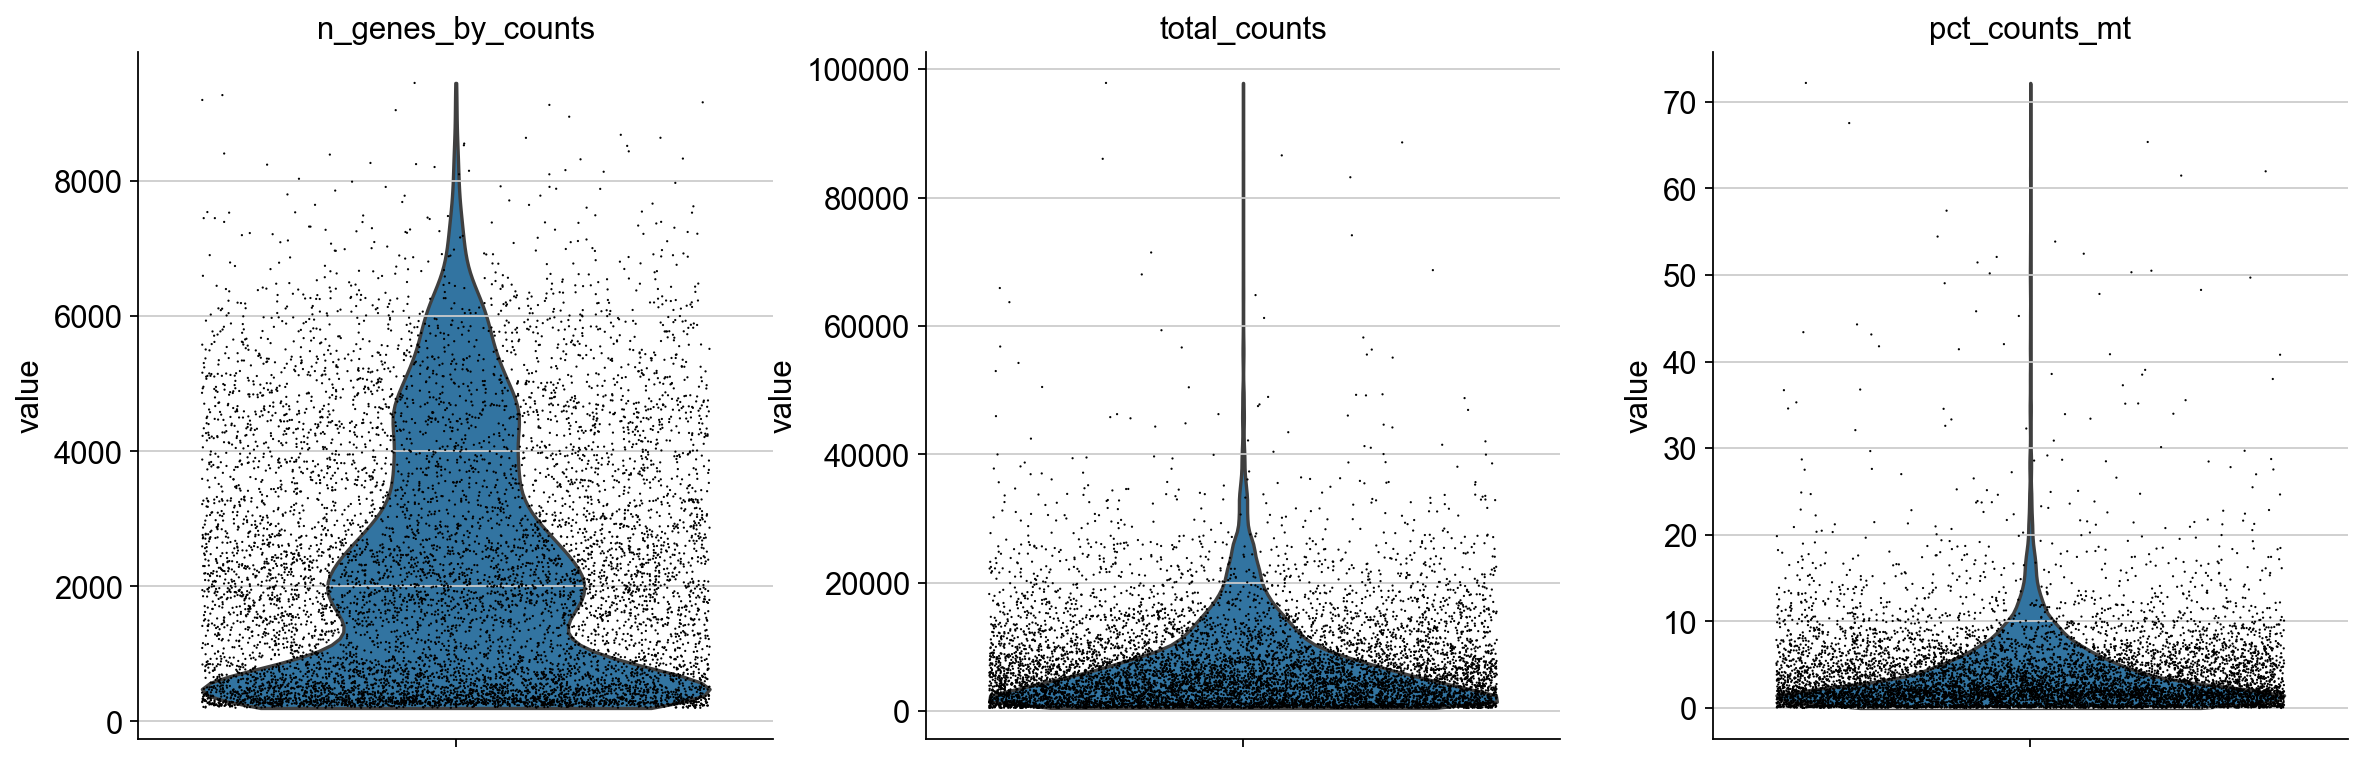

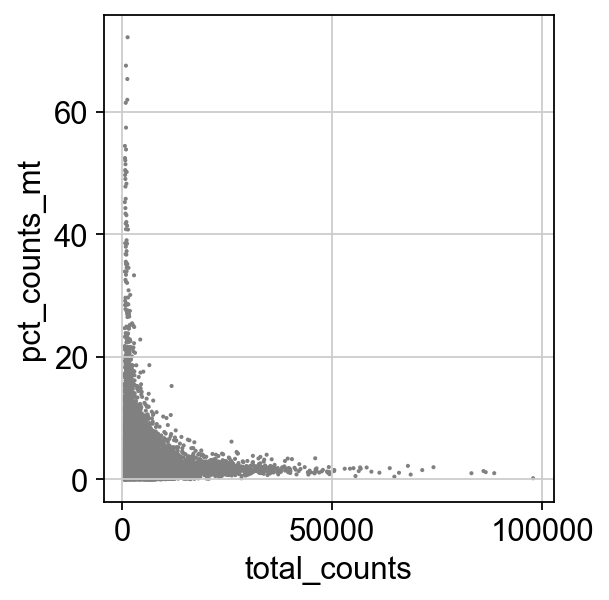

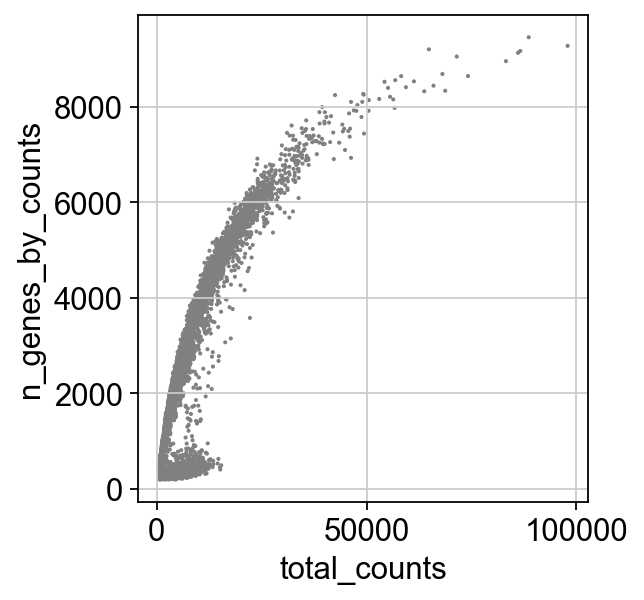

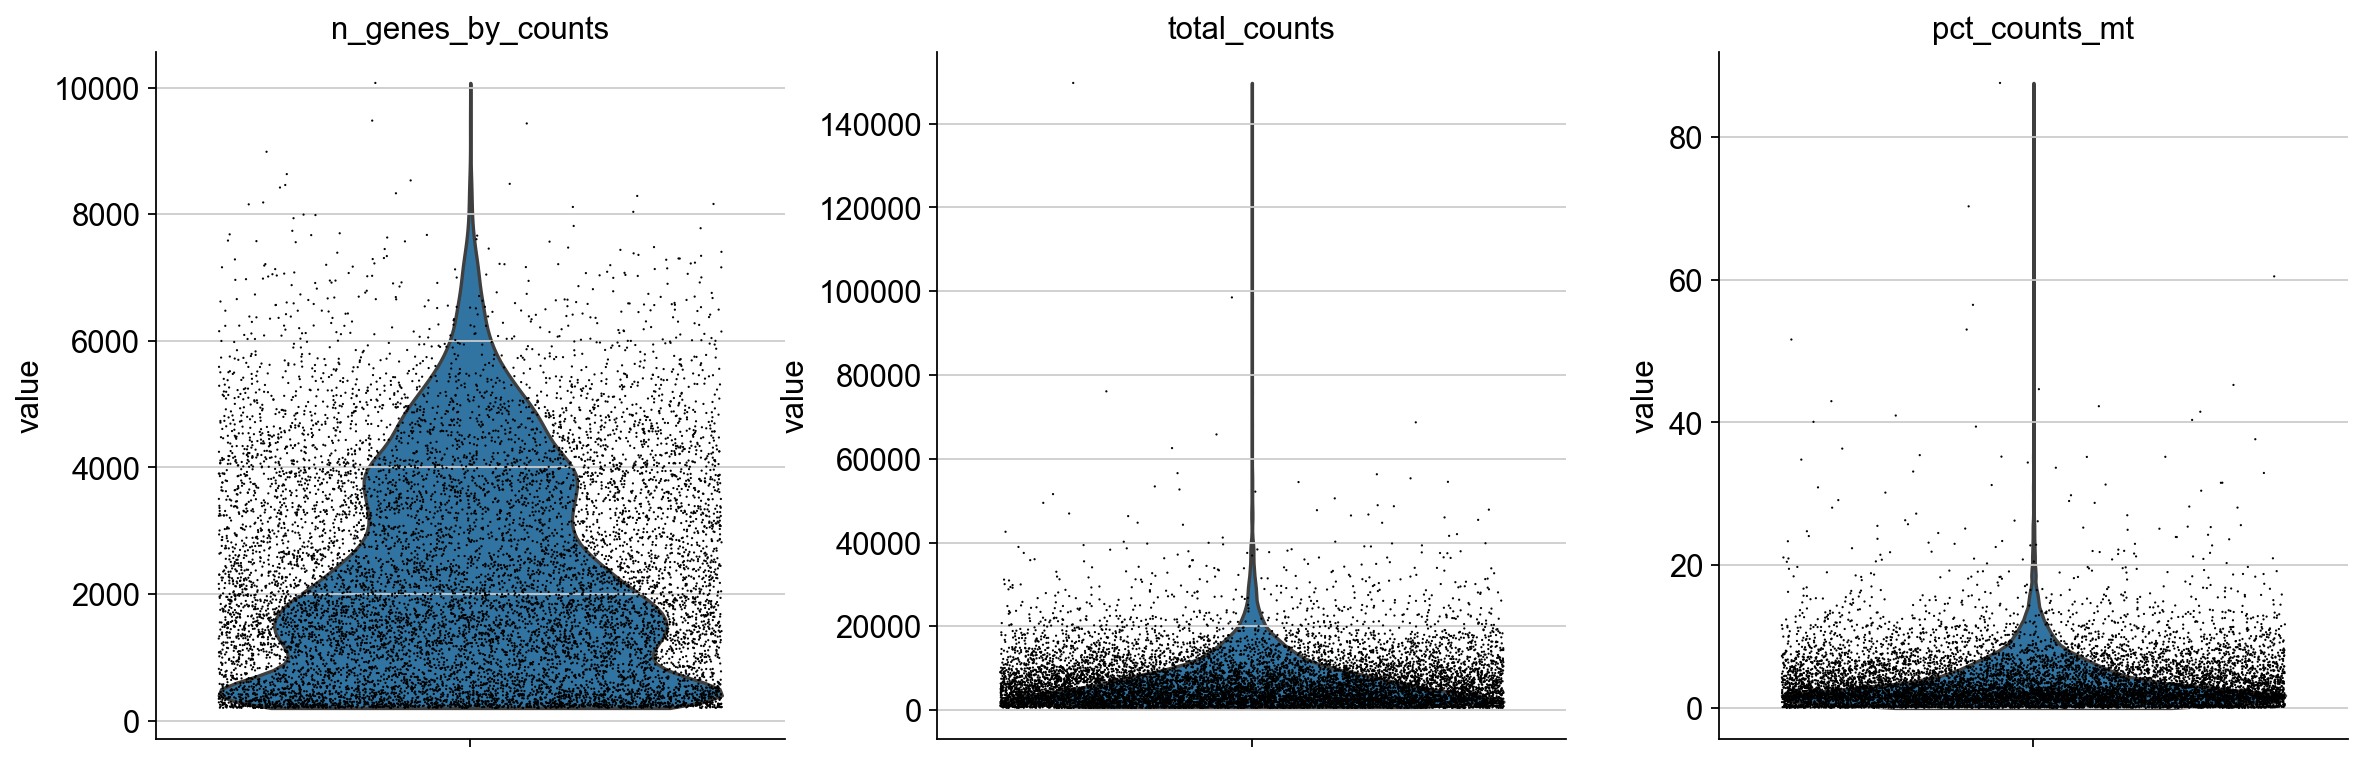

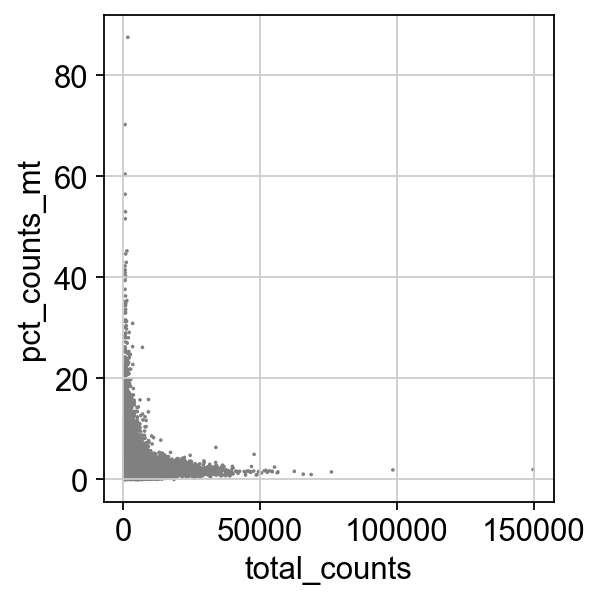

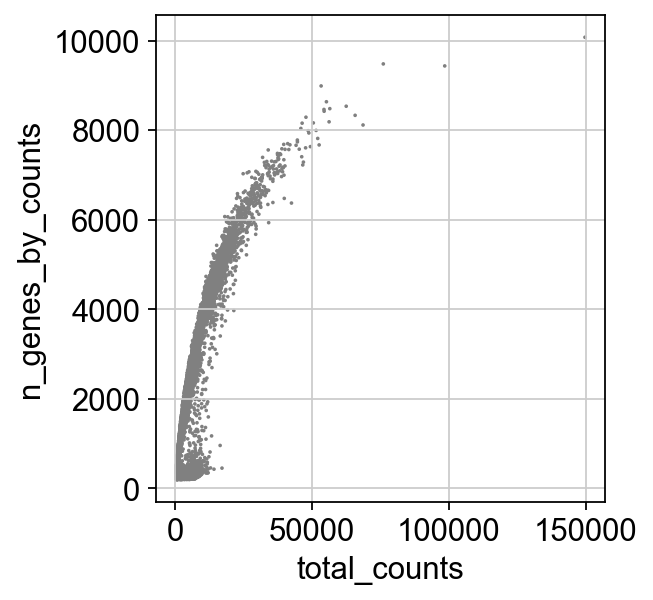

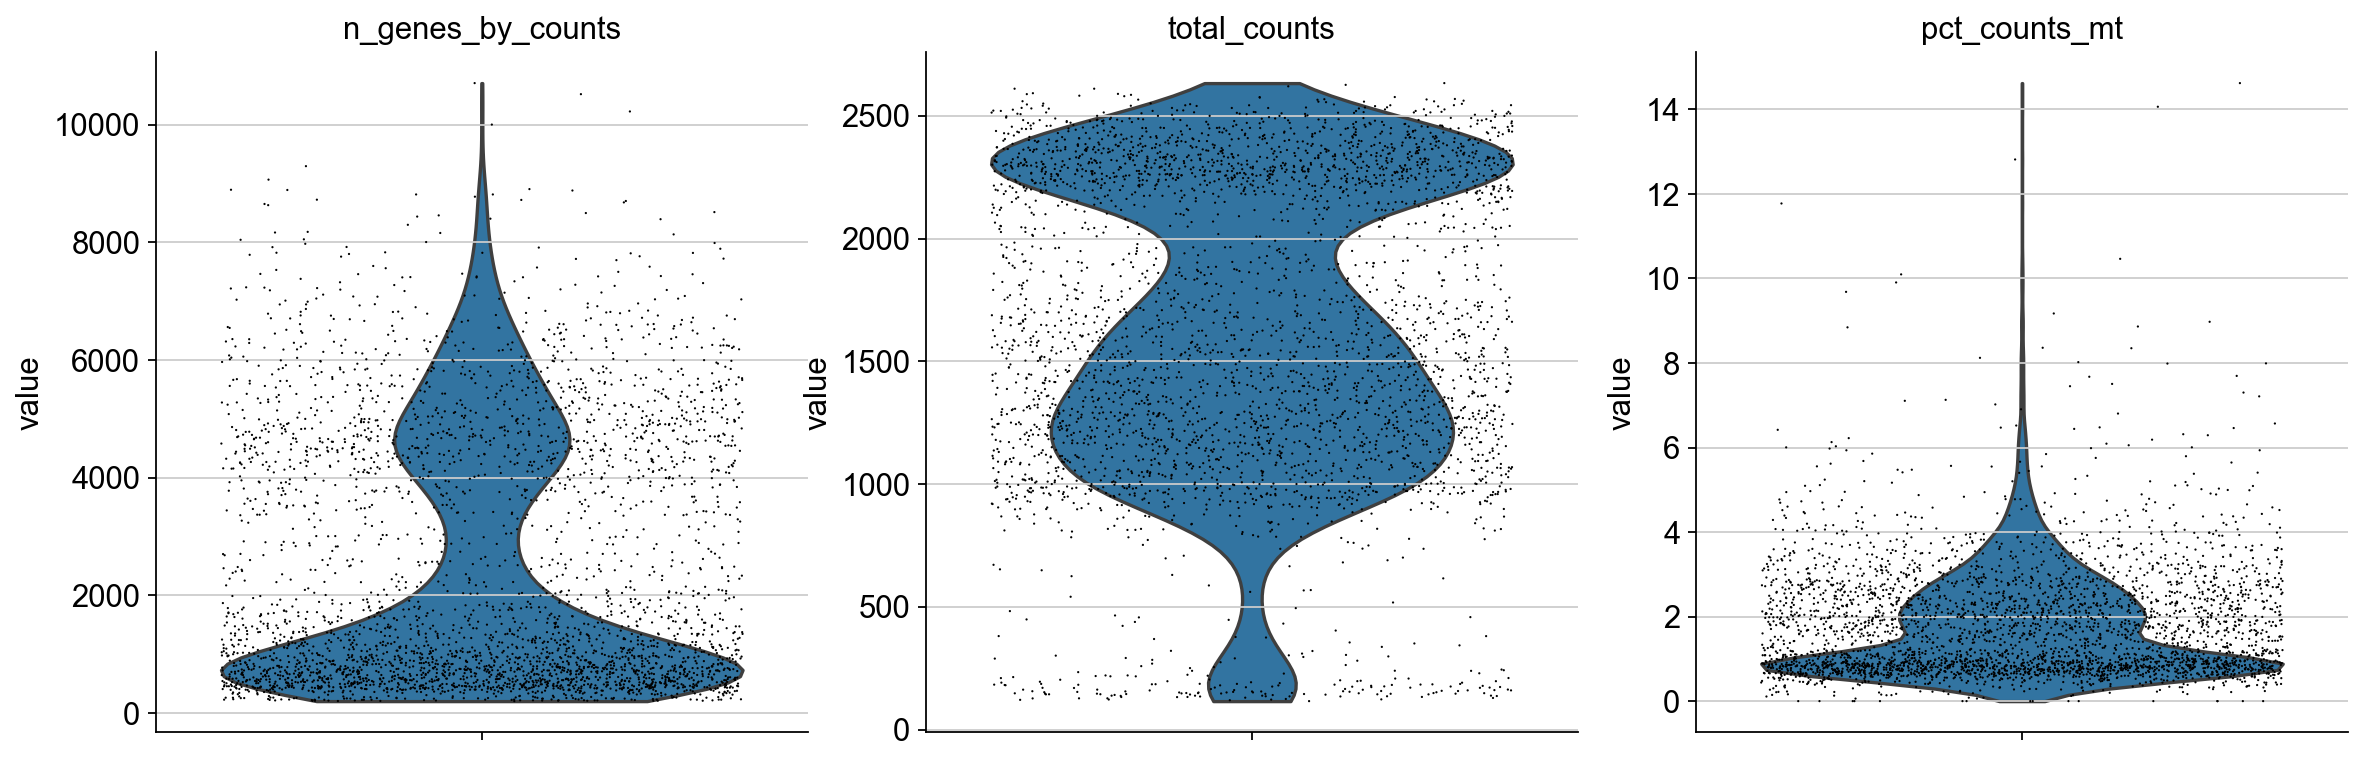

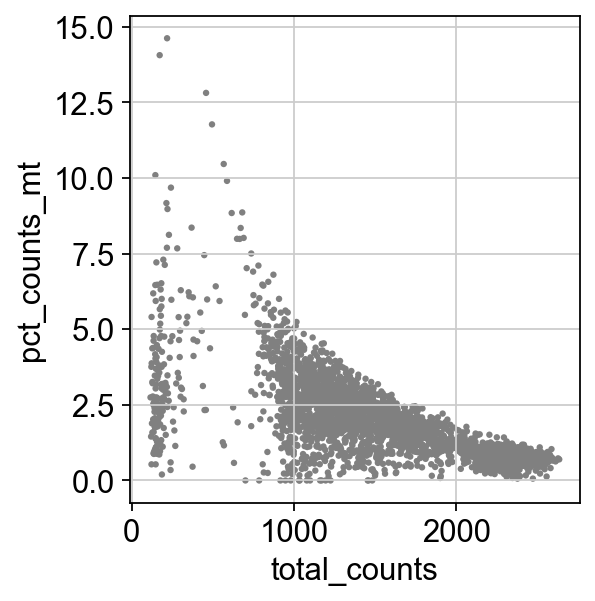

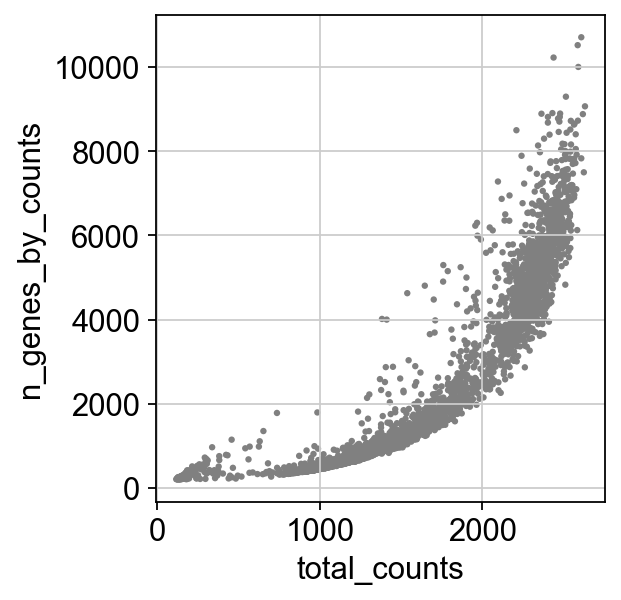

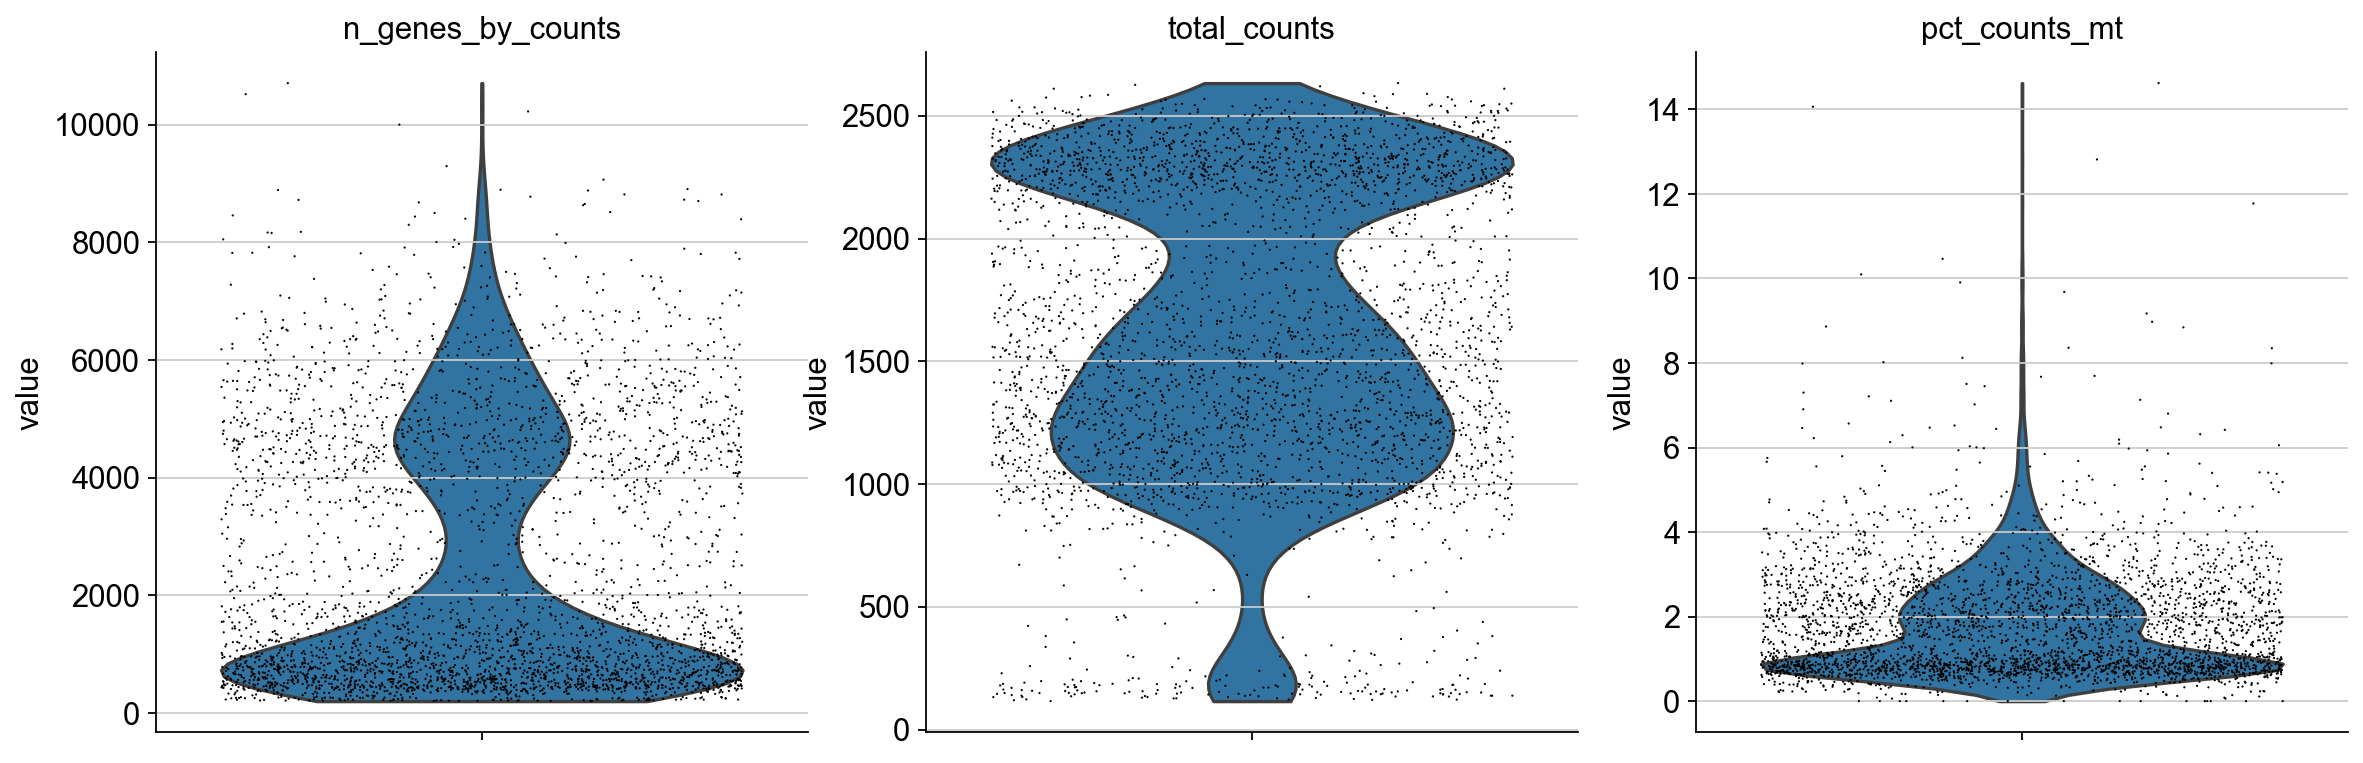

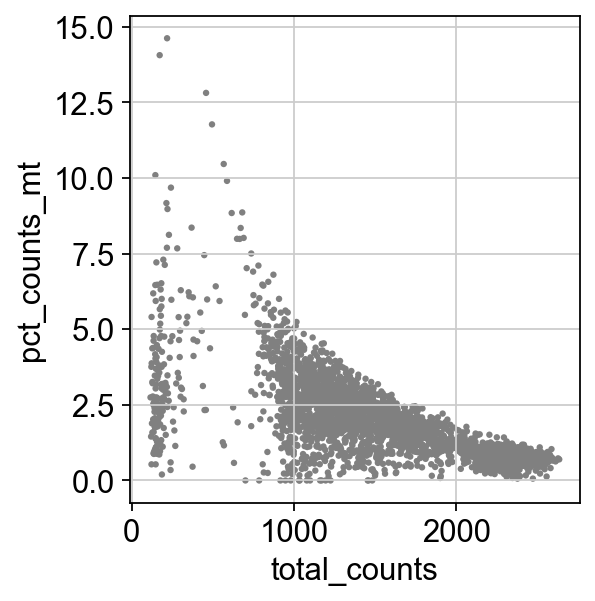

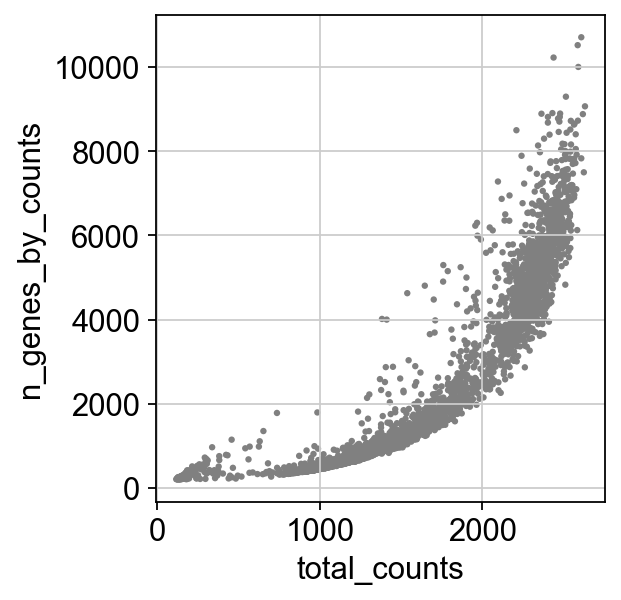

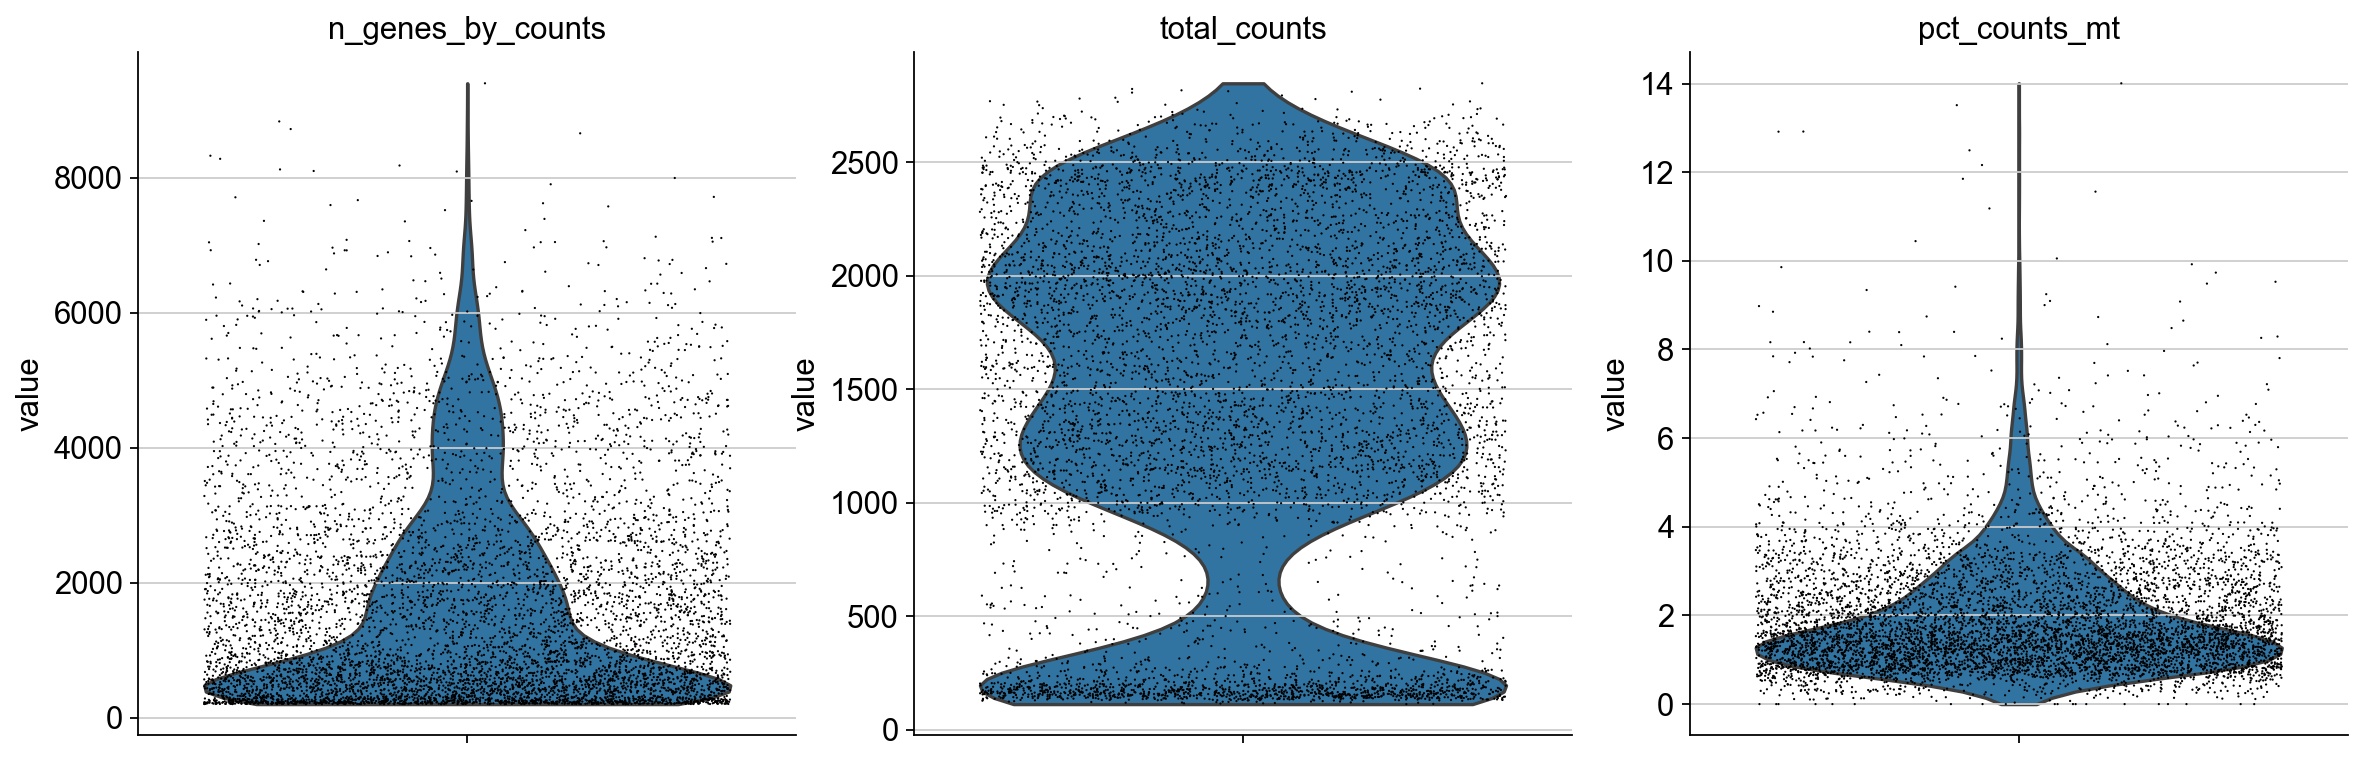

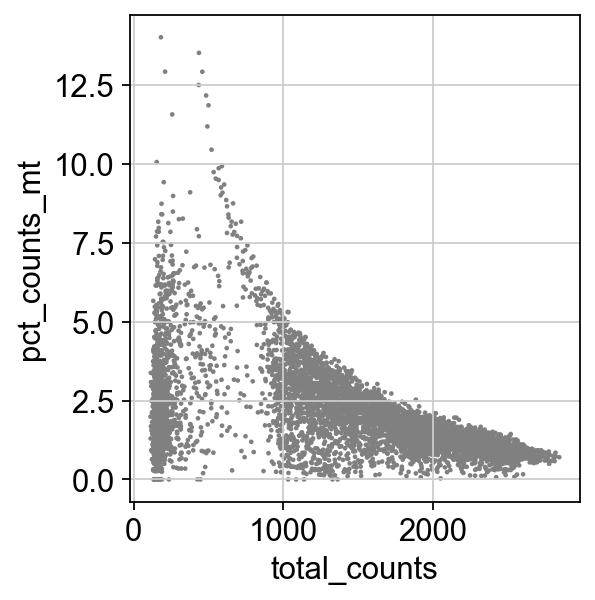

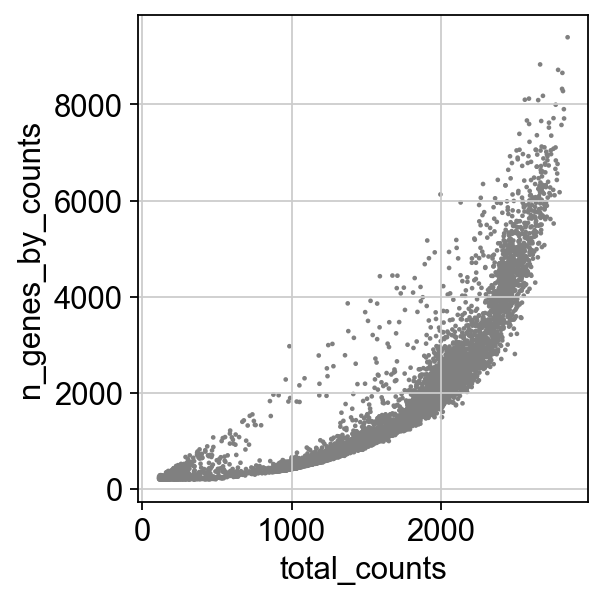

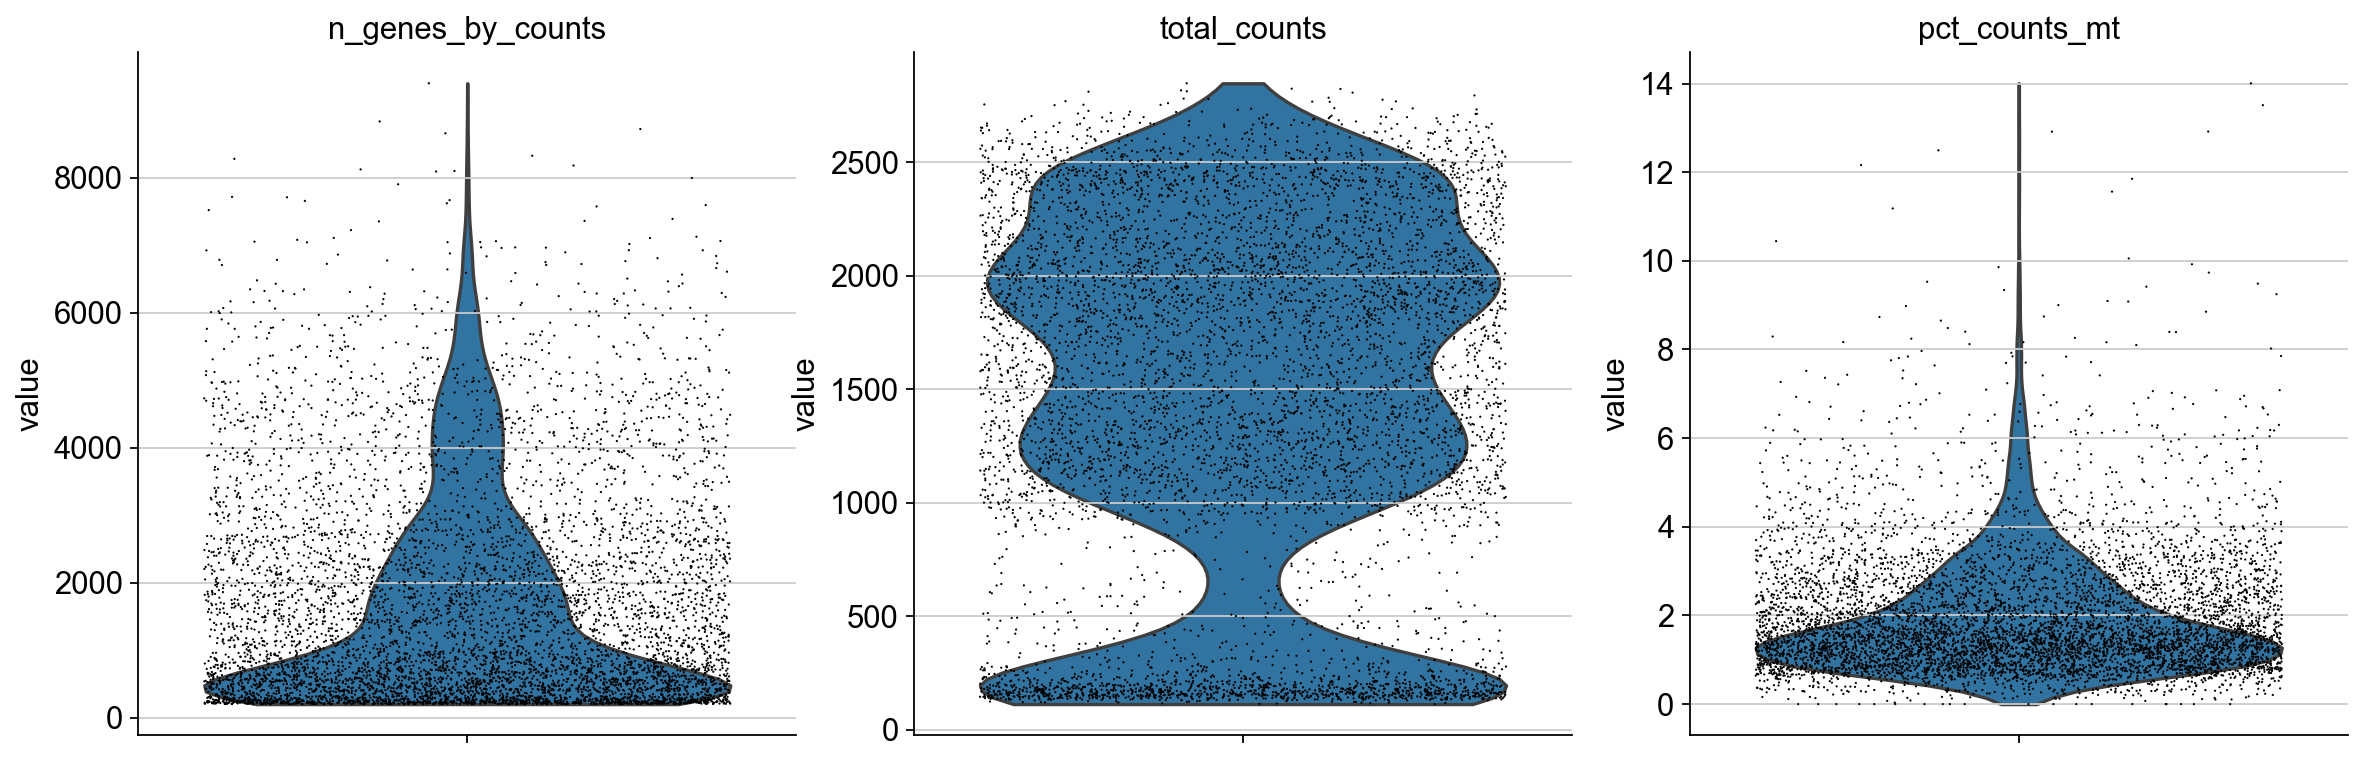

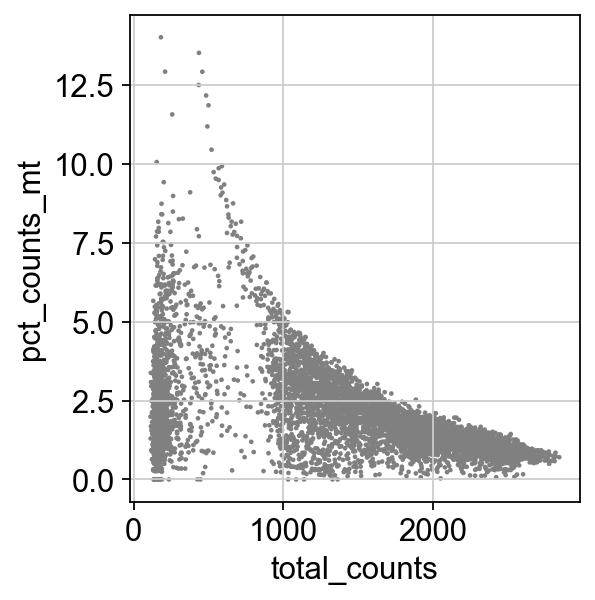

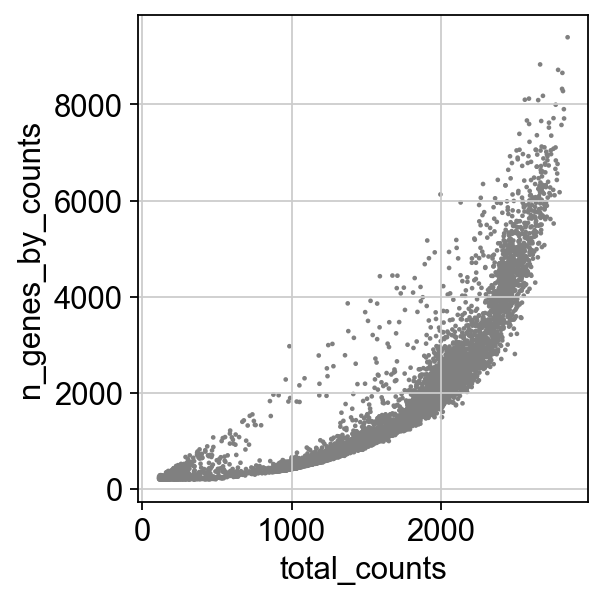

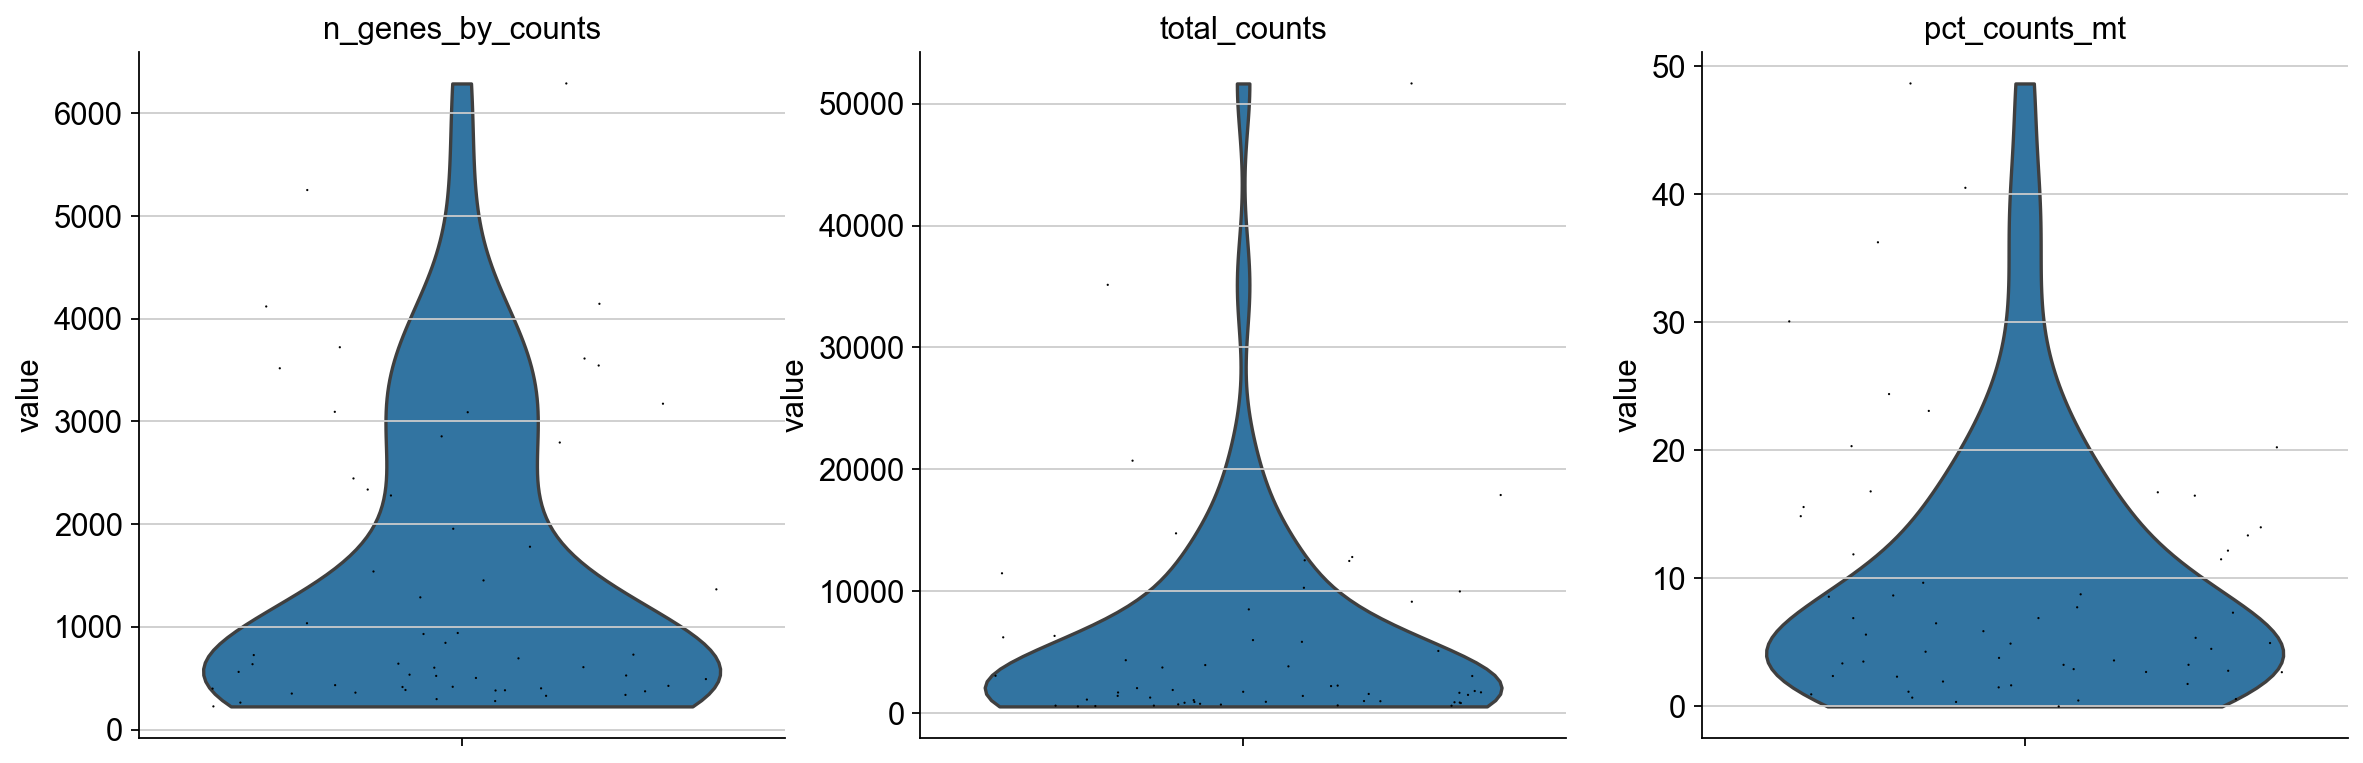

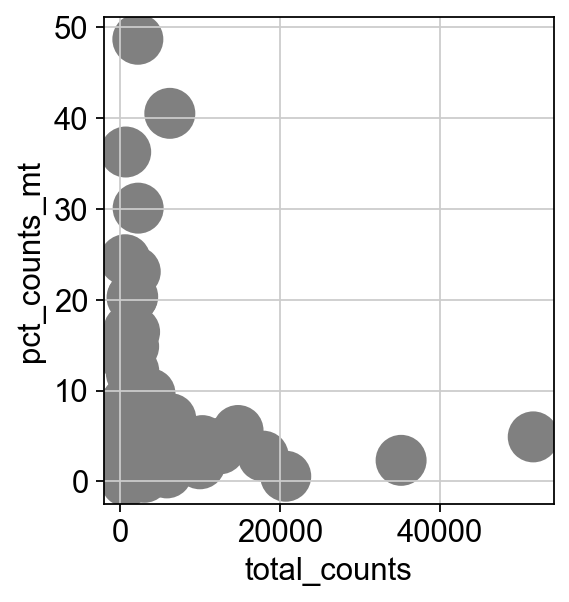

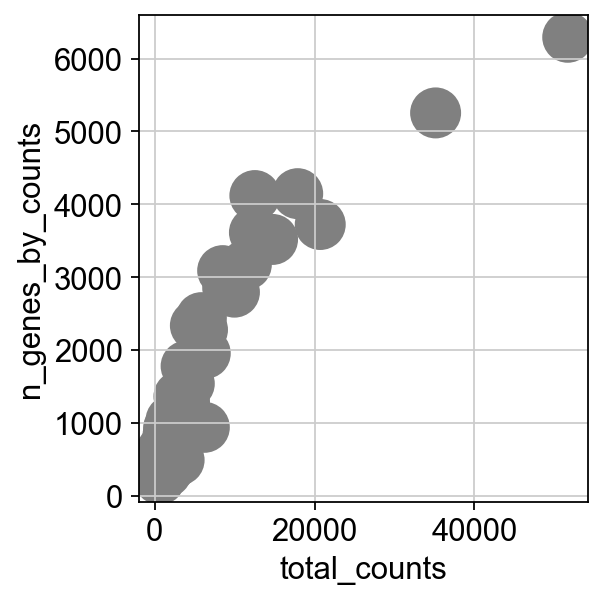

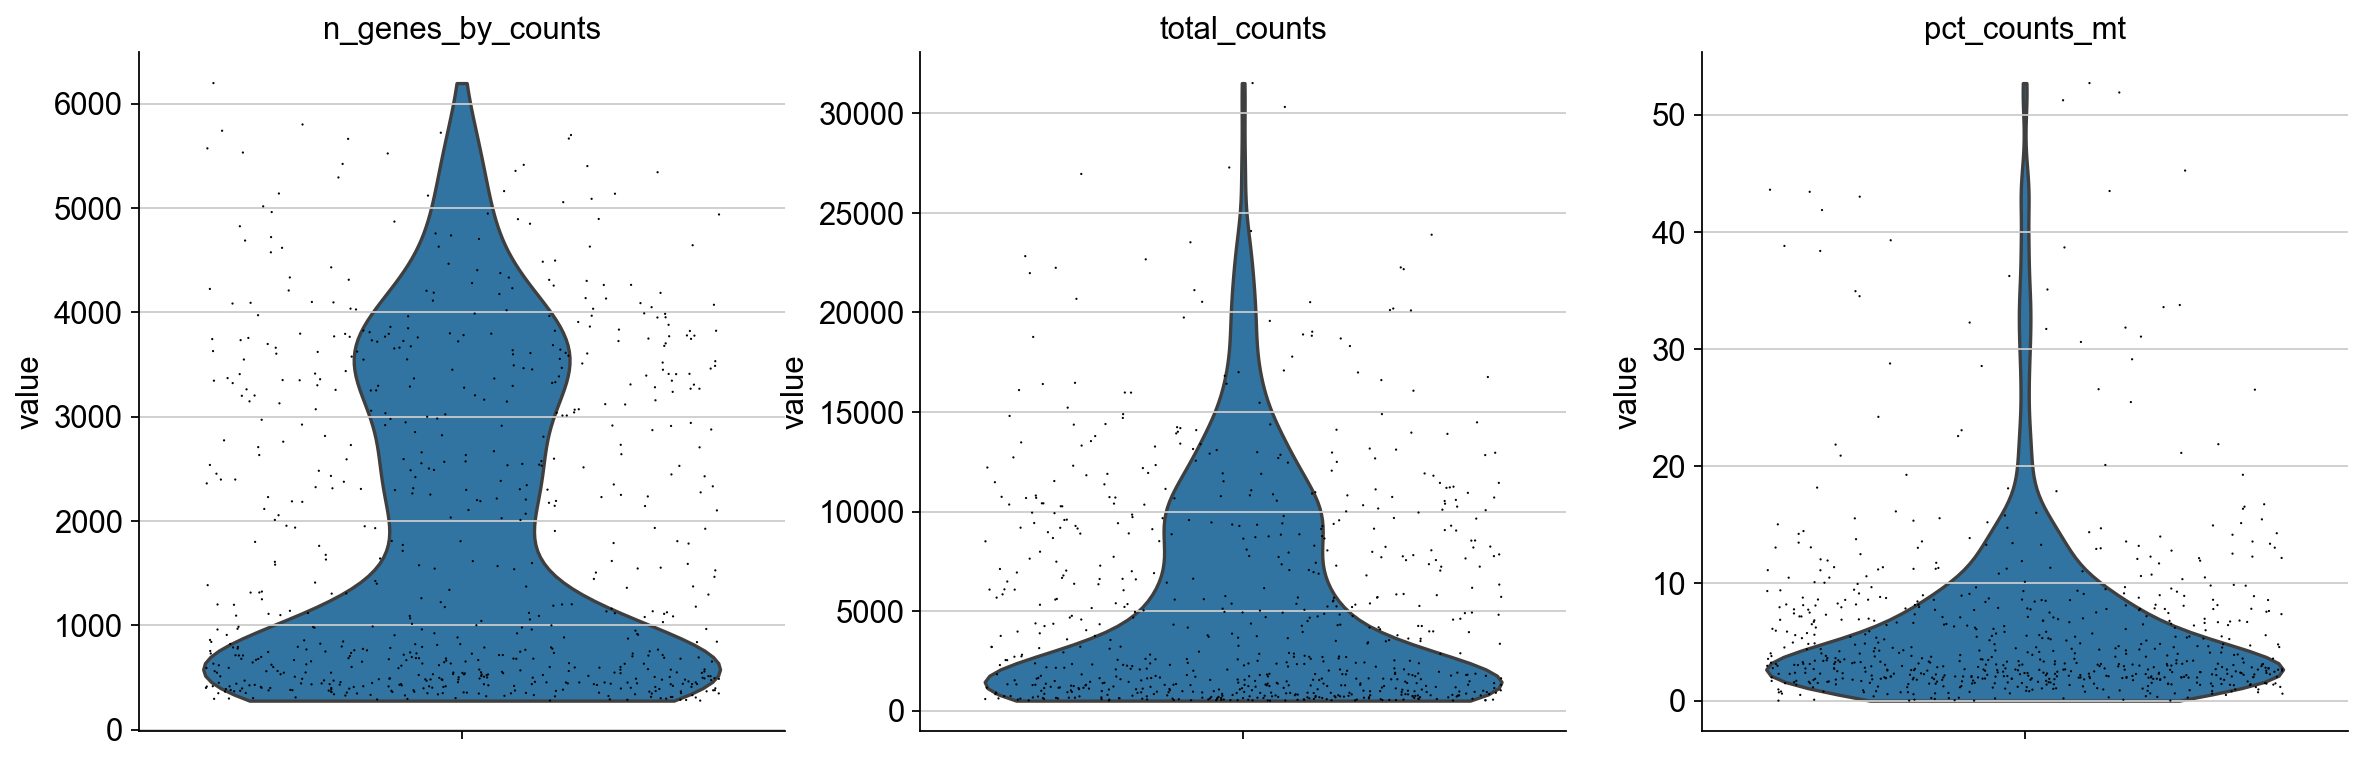

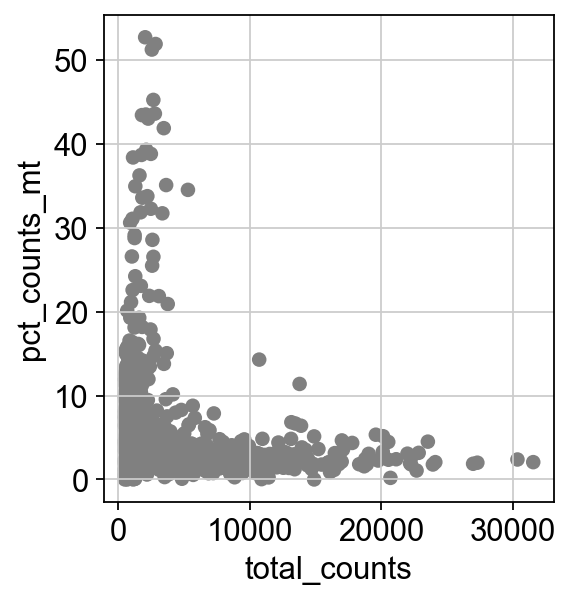

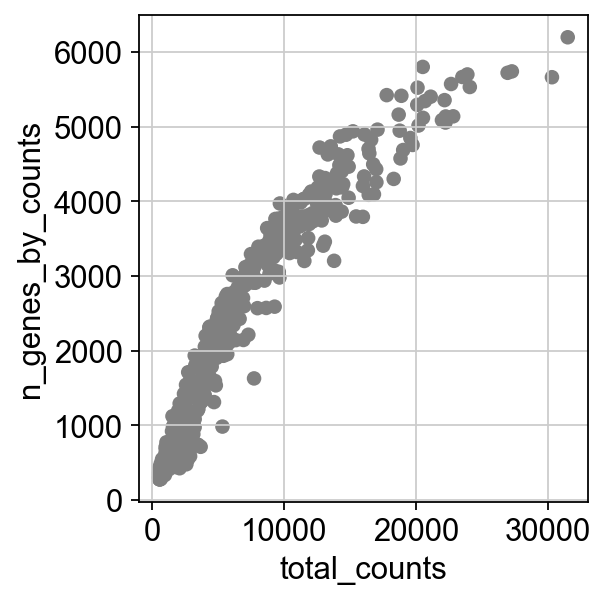

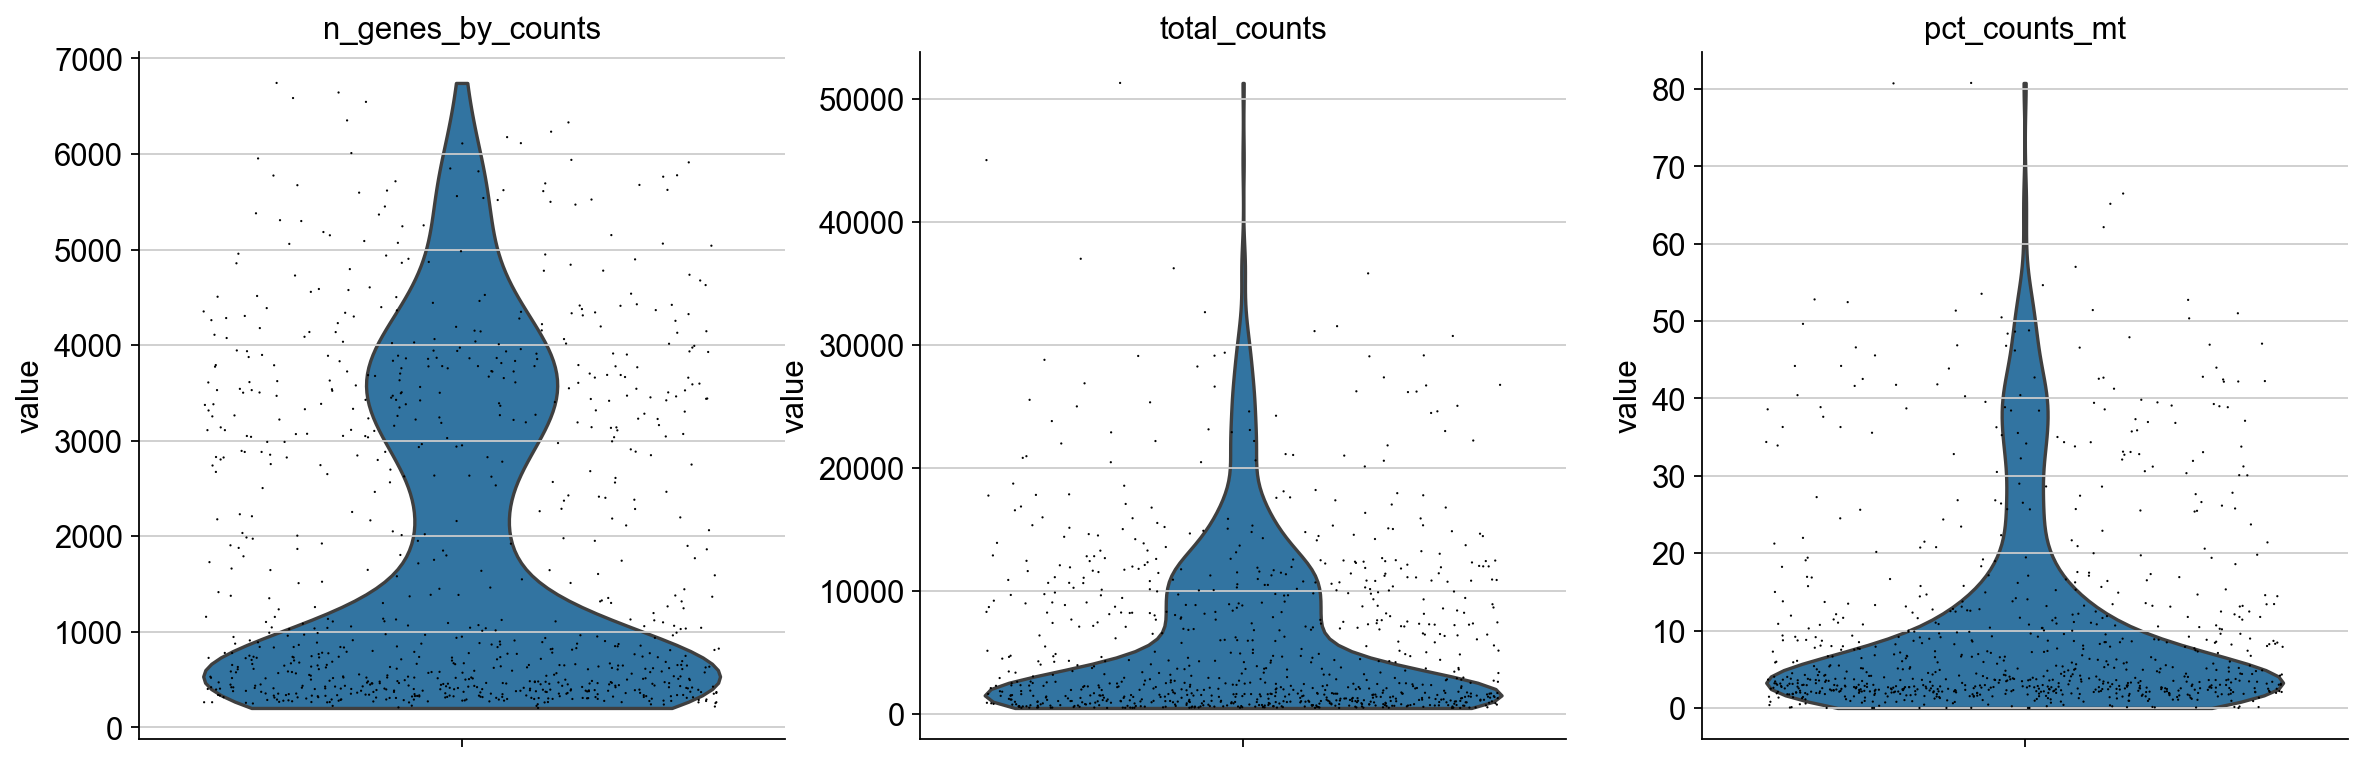

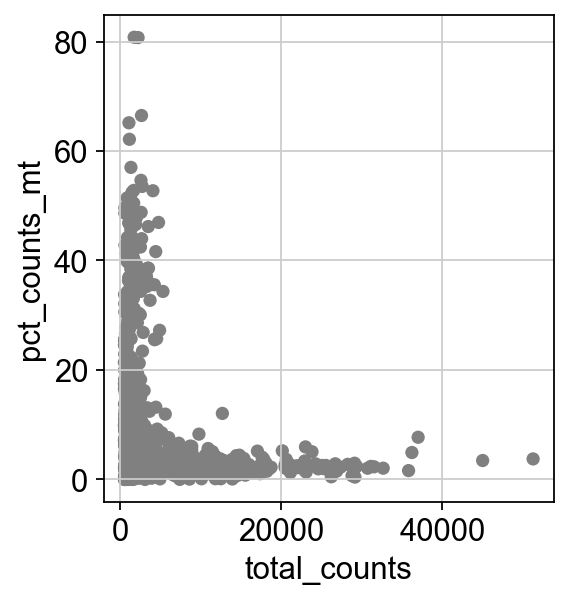

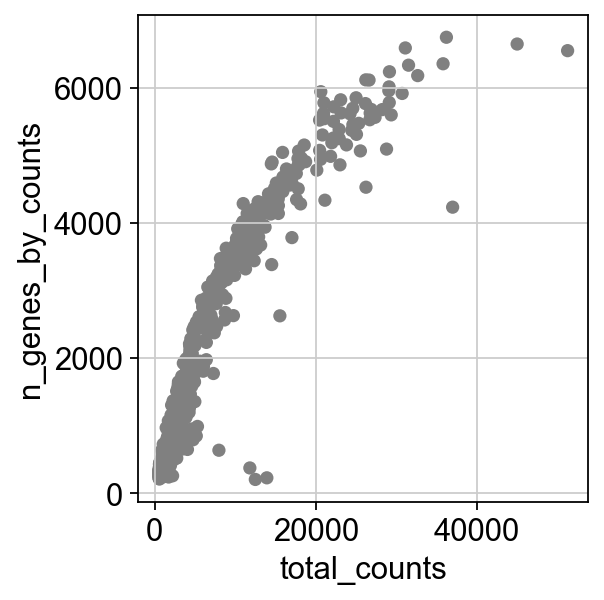

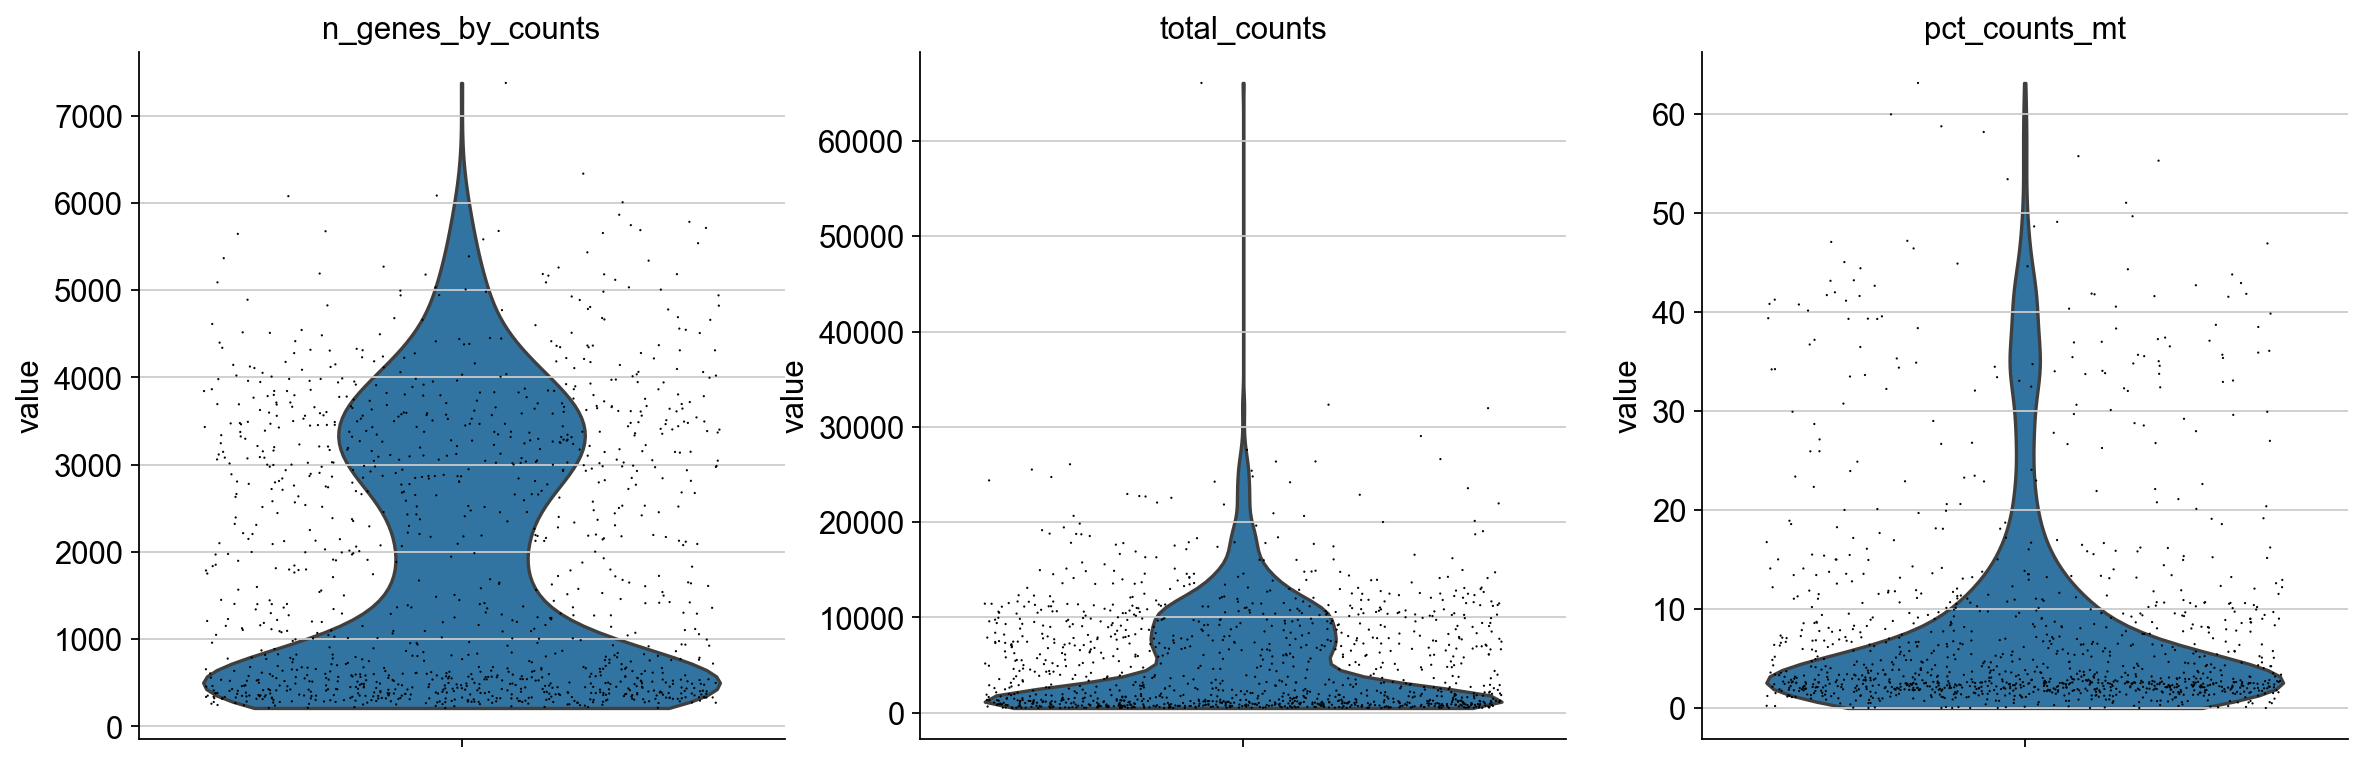

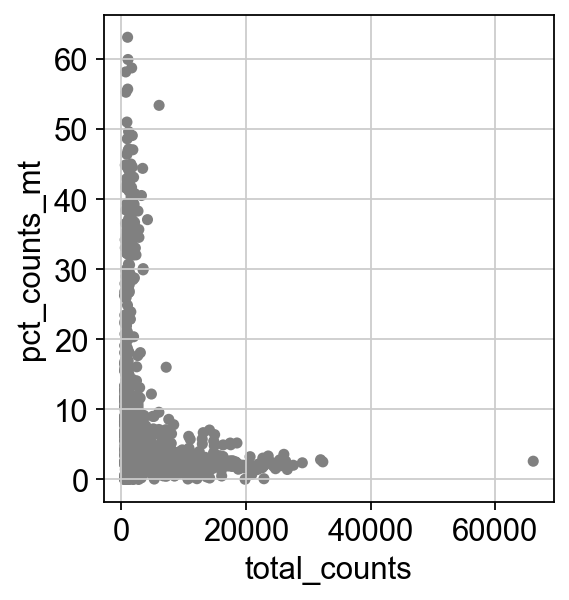

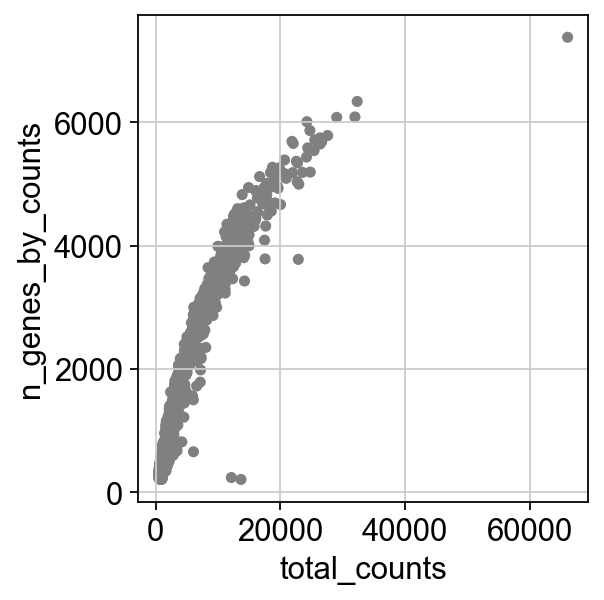

done


In [11]:
for a in ls:
    if a is not None:
        sc.pl.violin(a, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)
        sc.pl.scatter(a, x='total_counts', y='pct_counts_mt')
        sc.pl.scatter(a, x='total_counts', y='n_genes_by_counts')
print('done')

In [12]:
for a in ls:
    if a is not None:
        a = a[a.obs.n_genes_by_counts < 8000, :]
        a = a[a.obs.pct_counts_mt < 20, :]
print('done')

done


In [13]:
for a in ls:
    if a is not None:
        a.obs['tissue'] = 'cerebellum'
print('done')

done


In [14]:
#WT_M_p5: WT_p5
#WT_F_p5: WT_p5
#KO_M_p5: KO_p5
#KO_F_p5: KO_p5
#WT_M_15d: WT_15d
#WT_F_15d: WT_15d
#KO_M_15d: KO_15d
#KO_F_15d: KO_15d

In [15]:
adata_1.obs['genotype'] = 'WT_p5'
adata_2.obs['genotype'] = 'WT_p5'
adata_3.obs['genotype'] = 'KO_p5'
adata_4.obs['genotype'] = 'KO_p5'

adata_5.obs['genotype'] = 'WT_15d'
adata_6.obs['genotype'] = 'WT_15d'
adata_7.obs['genotype'] = 'KO_15d'
adata_8.obs['genotype'] = 'KO_15d'


In [16]:
for a in ls:
    a.obs.genotype = a.obs.genotype.astype('category')

In [17]:
adata_1

AnnData object with n_obs × n_vars = 8826 × 21844
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [18]:
adata_2

AnnData object with n_obs × n_vars = 11105 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [19]:
adata_5

AnnData object with n_obs × n_vars = 57 × 9310
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [20]:
sc.pp.pca(adata_1)
sc.pp.neighbors(adata_1)
sc.tl.umap(adata_1)
sc.tl.pca(adata_1)
sc.tl.leiden(adata_1)

computing PCA
    with n_comps=50
    finished (0:00:16)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)
computing PCA
    with n_comps=50
    finished (0:00:16)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


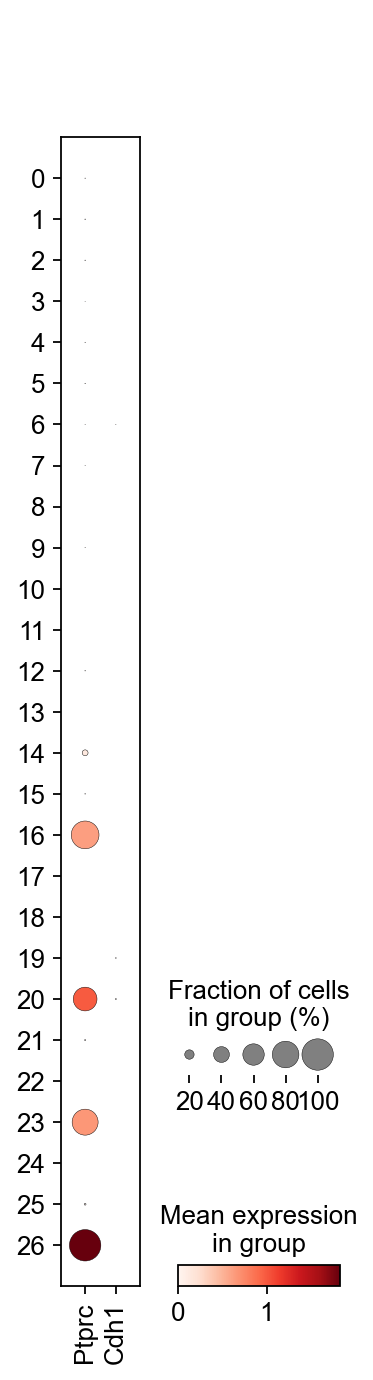

In [21]:
sc.pl.dotplot(adata_1, ['Ptprc','Cdh1'], groupby='leiden')

In [33]:
adata_1_epi = adata_1[adata_1.obs['leiden'].isin(['0','1','2','3','4','5','6','7','8','9','10',
                                                      '11','12','13','14','15','17','18','19',
                                                     '21','22','24','25'])]
adata_1_epi

View of AnnData object with n_obs × n_vars = 8458 × 21844
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [34]:
adata_1_imn = adata_1[adata_1.obs['leiden'].isin(['16','20','23','26'])]
adata_1_imn

View of AnnData object with n_obs × n_vars = 368 × 21844
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

computing PCA
    with n_comps=50
    finished (0:00:18)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing PCA
    with n_comps=50
    finished (0:00:18)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


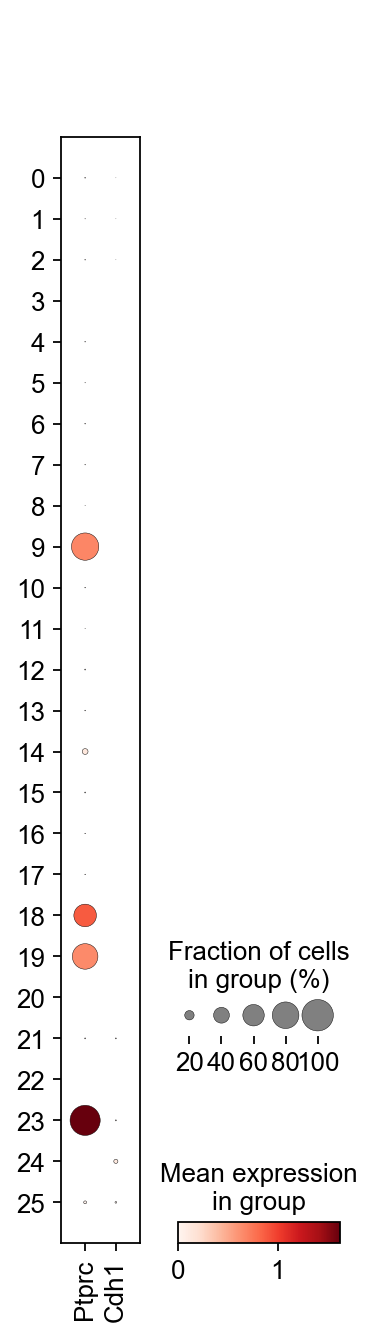

In [22]:
sc.pp.pca(adata_2)
sc.pp.neighbors(adata_2)
sc.tl.umap(adata_2)
sc.tl.pca(adata_2)
sc.tl.leiden(adata_2)
sc.pl.dotplot(adata_2, ['Ptprc','Cdh1'], groupby='leiden')

In [35]:
adata_2_epi = adata_2[adata_2.obs['leiden'].isin(['0','1','2','3','4','5','6','7','8','10',
                                                      '11','12','13','14','15','16','17','20',
                                                     '21','22','24','25'])]
adata_2_epi

View of AnnData object with n_obs × n_vars = 10169 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
adata_2_imn = adata_2[adata_2.obs['leiden'].isin(['9','18','19','23'])]
adata_2_imn

View of AnnData object with n_obs × n_vars = 936 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

computing PCA
    with n_comps=50
    finished (0:00:09)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
computing PCA
    with n_comps=50
    finished (0:00:09)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


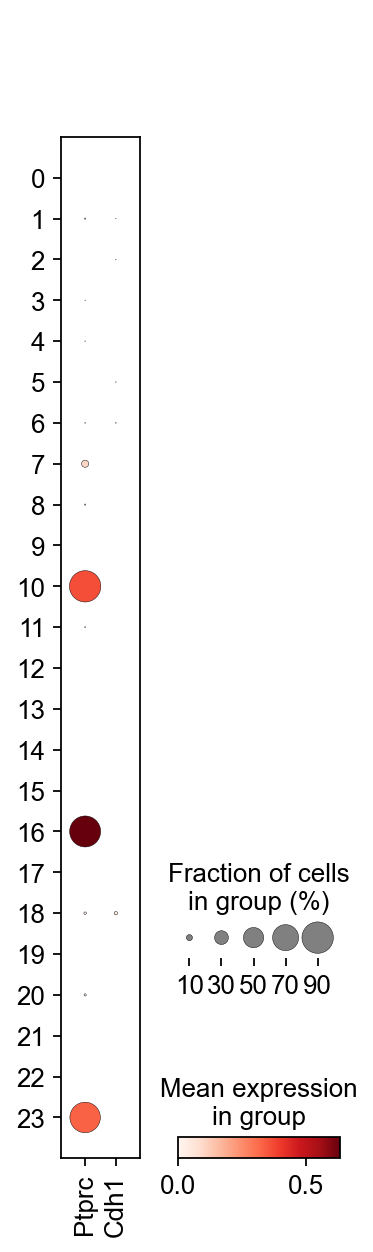

In [23]:
sc.pp.pca(adata_3)
sc.pp.neighbors(adata_3)
sc.tl.umap(adata_3)
sc.tl.pca(adata_3)
sc.tl.leiden(adata_3)
sc.pl.dotplot(adata_3, ['Ptprc','Cdh1'], groupby='leiden')

In [37]:
adata_3_epi = adata_3[adata_3.obs['leiden'].isin(['0','1','2','3','4','5','6','7','8','9','10',
                                                '12','13','14','15','17','18','19','20',
                                                     '21','22'])]
adata_3_epi

View of AnnData object with n_obs × n_vars = 3391 × 20352
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [38]:
adata_3_imn = adata_3[adata_3.obs['leiden'].isin(['11','16','23'])]
adata_3_imn

View of AnnData object with n_obs × n_vars = 215 × 20352
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

computing PCA
    with n_comps=50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
computing PCA
    with n_comps=50
    finished (0:00:12)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


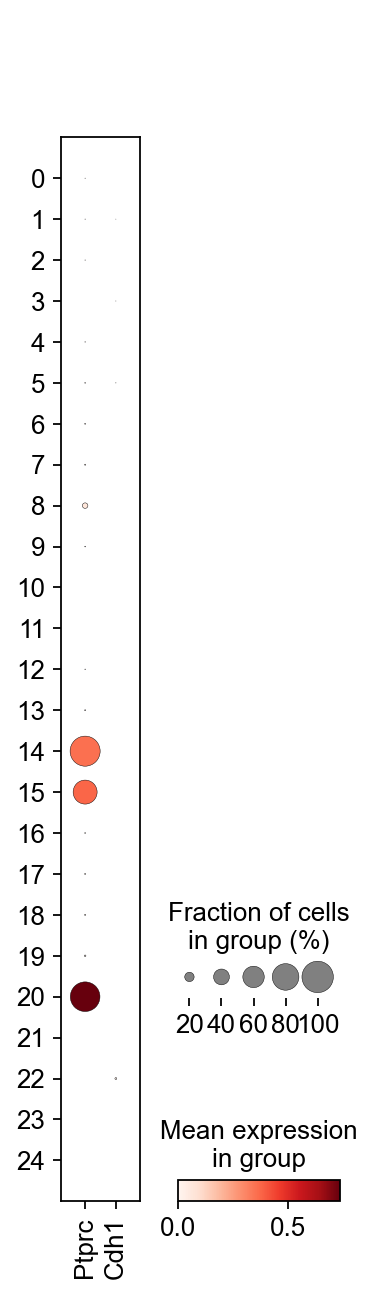

In [24]:
sc.pp.pca(adata_4)
sc.pp.neighbors(adata_4)
sc.tl.umap(adata_4)
sc.tl.pca(adata_4)
sc.tl.leiden(adata_4)
sc.pl.dotplot(adata_4, ['Ptprc','Cdh1'], groupby='leiden')

In [26]:
adata_4_epi = adata_4[adata_4.obs['leiden'].isin(['0','1','2','3','4','5','6','7','8','9','10',
                                                      '11','12','13','16','17','18','19',
                                                     '21','22','23','24'])]
adata_4_epi

View of AnnData object with n_obs × n_vars = 6451 × 20590
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [27]:
adata_4_imn = adata_4[adata_4.obs['leiden'].isin(['14','15','20'])]
adata_4_imn

View of AnnData object with n_obs × n_vars = 339 × 20590
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

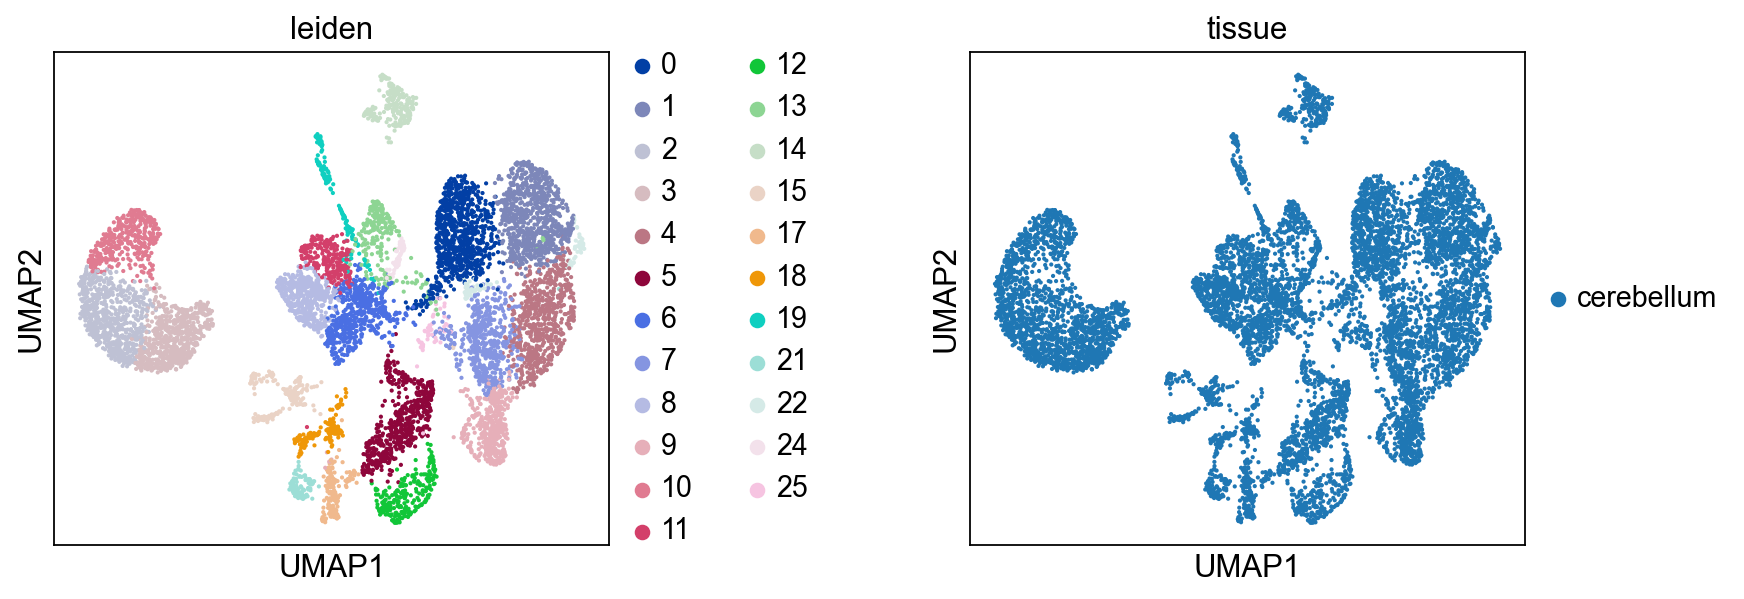

In [45]:
sc.pl.umap(adata_1_epi, color=['leiden', 'tissue'], wspace=0.5)

In [ ]:
ls = [adata_1_epi, adata_2_epi, adata_3_epi, adata_4_epi]

In [48]:
for a in ls:
    if a is not None:
        a.var_names_make_unique()
print('done')

done


In [ ]:
adata_1_epi.obs['genotype_orig'] = 'WT'
adata_2_epi.obs['genotype_orig'] = 'WT'
adata_3_epi.obs['genotype_orig'] = 'KO'
adata_4_epi.obs['genotype_orig'] = 'KO'

adata_1_imn.obs['genotype_orig'] = 'WT'
adata_2_imn.obs['genotype_orig'] = 'WT'
adata_3_imn.obs['genotype_orig'] = 'KO'
adata_4_imn.obs['genotype_orig'] = 'KO'


In [ ]:
#WT_M_p5
#WT_F_p5
#KO_M_p5
#KO_F_p5

adata_1_epi.obs['genotype_gender'] = 'WT_M_p5'
adata_2_epi.obs['genotype_gender'] = 'WT_F_p5'
adata_3_epi.obs['genotype_gender'] = 'KO_M_p5'
adata_4_epi.obs['genotype_gender'] = 'KO_F_p5'


adata_1_imn.obs['genotype_gender'] = 'WT_M_p5'
adata_2_imn.obs['genotype_gender'] = 'WT_F_p5'
adata_3_imn.obs['genotype_gender'] = 'KO_M_p5'
adata_4_imn.obs['genotype_gender'] = 'KO_F_p5'


In [69]:
adata_2_epi

AnnData object with n_obs × n_vars = 10169 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [51]:
adata_A = adata_1_epi.concatenate(adata_2_epi,adata_3_epi, adata_4_epi, adata_5_epi, adata_6_epi,
                                  adata_7_epi,adata_8_epi,
                               batch_key='batch')



In [ ]:
adata_B = adata_1_imn.concatenate(adata_2_imn,adata_3_imn, adata_4_imn,
                               batch_key='batch')



In [53]:
adata_A.raw = adata_A

In [54]:
adata_B.raw = adata_B

In [55]:
adata_A.obs['genotype_orig']

AAACCCAAGACCAACG-1-0    WT
AAACCCAAGCAGTAAT-1-0    WT
AAACCCAAGCGAGGAG-1-0    WT
AAACCCAAGGATACCG-1-0    WT
AAACCCACAGAGAAAG-1-0    WT
                        ..
TTTGACTGTCACTTAG-1-7    KO
TTTGATCAGTCACTCA-1-7    KO
TTTGATCGTCAAAGCG-1-7    KO
TTTGGAGGTGCGAACA-1-7    KO
TTTGGTTTCTCCTGCA-1-7    KO
Name: genotype_orig, Length: 31172, dtype: object

In [56]:
adata_B.obs['genotype_orig']

AAACGCTGTTGCACGC-1-0    WT
AAAGAACGTAATGCTC-1-0    WT
AAAGGGCCAACGATTC-1-0    WT
AACAACCAGTTAGAAC-1-0    WT
AACCACAGTCAGATTC-1-0    WT
                        ..
TGGGAAGAGTAAGGGA-1-6    KO
TGGTAGTAGACCATAA-1-6    KO
TTGGGCGTCGCTCTAC-1-6    KO
TTTACTGGTTACCCAA-1-6    KO
TTTGACTCACTTCTCG-1-6    KO
Name: genotype_orig, Length: 1956, dtype: object

In [57]:
adata_A.obs.genotype = adata_A.obs.genotype.astype('category')
adata_B.obs.genotype = adata_B.obs.genotype.astype('category')

In [58]:
adata_A

AnnData object with n_obs × n_vars = 31172 × 9277
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells-5', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'n_cells-6', 'n_cells_by_counts-6', 'mean_counts-6', 'pct_dropout_by_counts-6', 'total_counts-6', 'n_cells-7', 'n_cells_by_counts-7', 'mean_counts-7'

In [59]:
adata_B

AnnData object with n_obs × n_vars = 1956 × 15328
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells-5', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'n_cells-6', 'n_cells_by_counts-6', 'mean_counts-6', 'pct_dropout_by_counts-6', 'total_counts-6'
    obsm: 'X_pca', 'X_umap'

# Check

In [ ]:
#WT_M_p5
#WT_F_p5
#KO_M_p5
#KO_F_p5


In [80]:
adata_2_epi

AnnData object with n_obs × n_vars = 10169 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_1_epi.write('WT_M_p5_non_immune_pp.h5ad', compression='gzip')
adata_2_epi.write('WT_F_p5_non_immune_pp.h5ad', compression='gzip')
adata_3_epi.write('KO_M_p5_non_immune_pp.h5ad', compression='gzip')
adata_4_epi.write('KO_F_p5_non_immune_pp.h5ad', compression='gzip')


In [ ]:
adata_1_imn.write('WT_M_p5_immune_pp.h5ad', compression='gzip')
adata_2_imn.write('WT_F_p5_immune_pp.h5ad', compression='gzip')
adata_3_imn.write('KO_M_p5_immune_pp.h5ad', compression='gzip')
adata_4_imn.write('KO_F_p5_immune_pp.h5ad', compression='gzip')


In [85]:
adata_2 = sc.read('WT_F_p5_non_immune_pp.h5ad')
adata_2

AnnData object with n_obs × n_vars = 10169 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [63]:
#del adata_A.obs['cell_id']
#del adata_B.obs['cell_id']

In [64]:
adata_A.write('Non_immune_8_samples_pp_and_concatenated_02-15-24.h5ad', compression='gzip')

In [65]:
adata_B.write('Immune_8_samples_pp_and_concatenated_02-15-24.h5ad', compression='gzip')